<a href="https://colab.research.google.com/github/dunstanms/Unsupervised_Stock_data_learning/blob/main/stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead



### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from google.colab import files
files.upload()

TypeError: 'NoneType' object is not subscriptable

## Data Overview

- Observations
- Sanity checks

In [ ]:
df=pd.read_csv("/content/stock_data.csv")
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

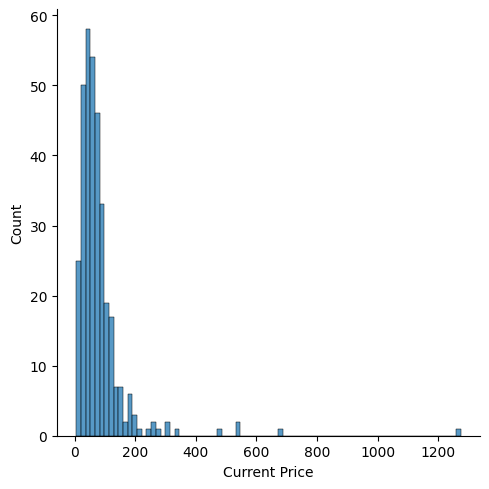

In [ ]:
# prompt: Using dataframe df: distribution plot

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['Current Price'])
plt.show()


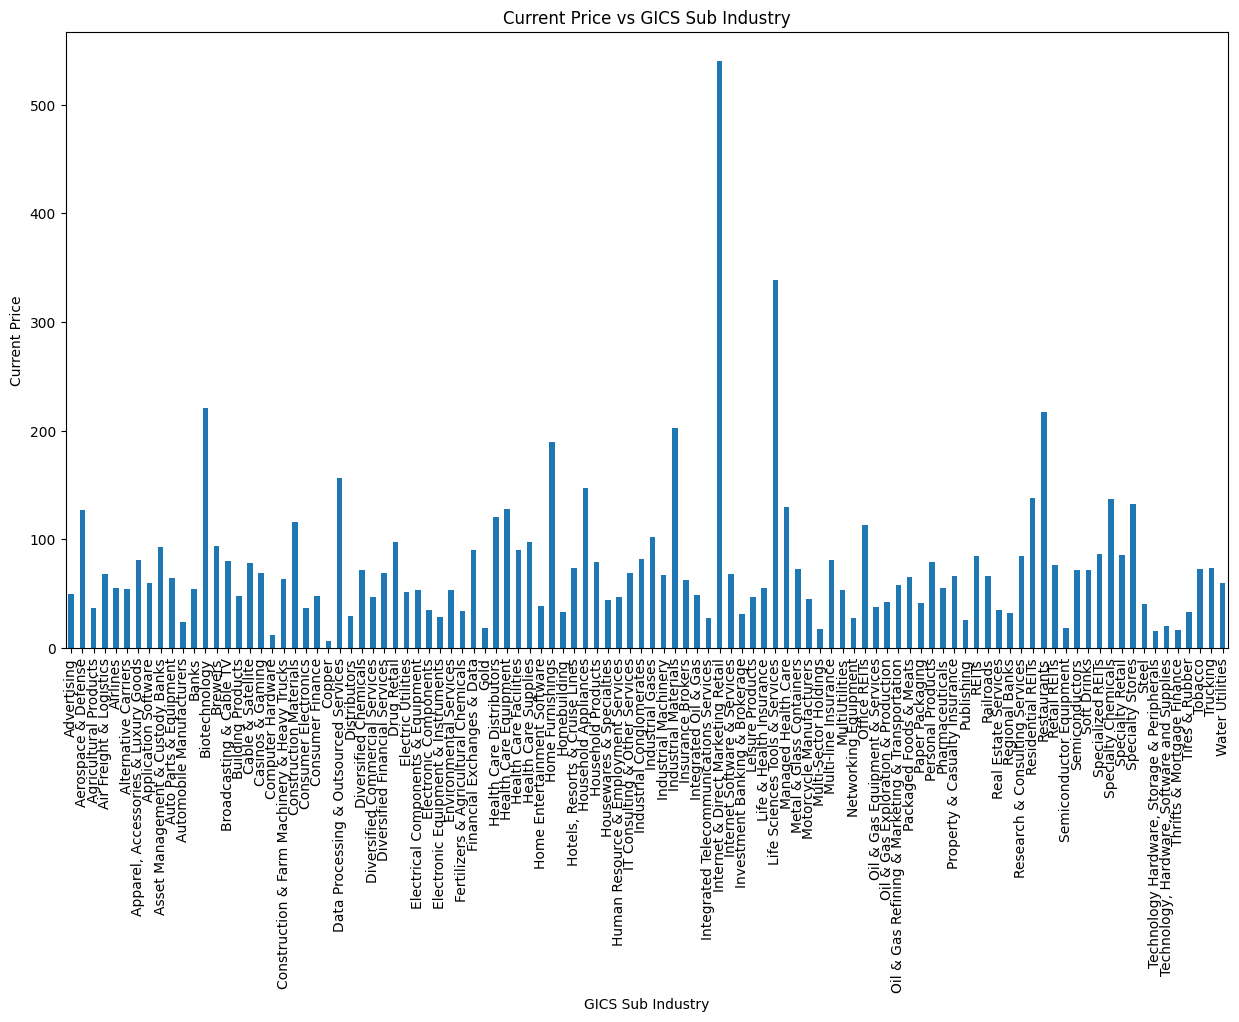

In [ ]:
#  Current Price vs GICS sub industry
plt.figure(figsize=(15, 8))
df.groupby('GICS Sub Industry')['Current Price'].mean().plot(kind='bar')
plt.title('Current Price vs GICS Sub Industry')
plt.xlabel('GICS Sub Industry')
_ = plt.ylabel('Current Price')

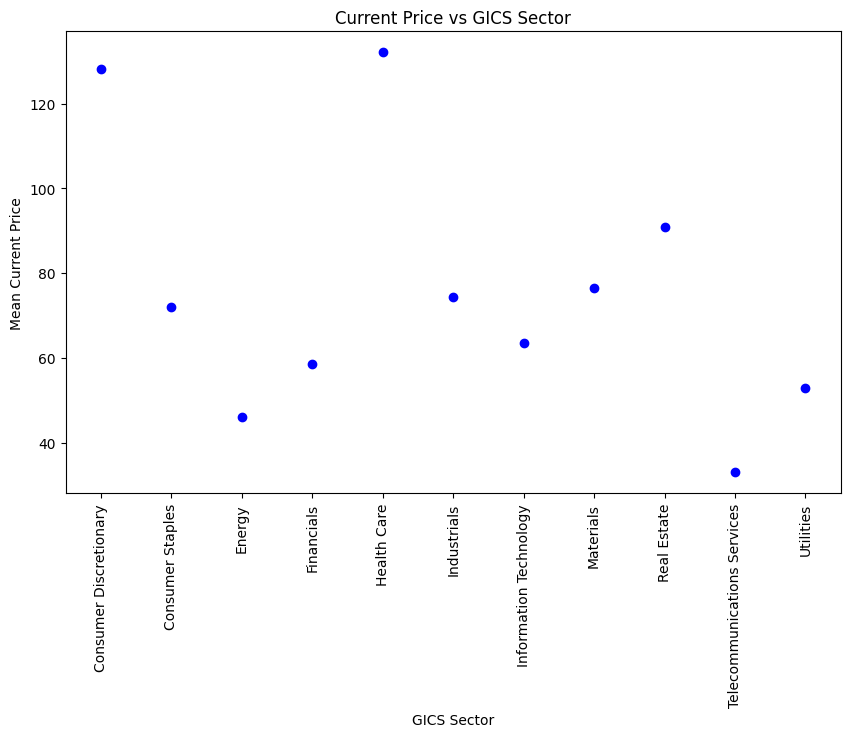

<Figure size 1500x800 with 0 Axes>

In [ ]:


# Grouping by 'GICS Sector' and calculating mean 'Current Price'
grouped_data = df.groupby('GICS Sector')['Current Price'].mean()

# Creating a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(grouped_data.index, grouped_data.values, marker='o', color='b')

# Adding titles and labels
plt.title('Current Price vs GICS Sector')
plt.xlabel('GICS Sector')
plt.ylabel('Mean Current Price')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=90)
plt.figure(figsize=(15, 8))

plt.show()


Text(0, 0.5, 'Current Price')

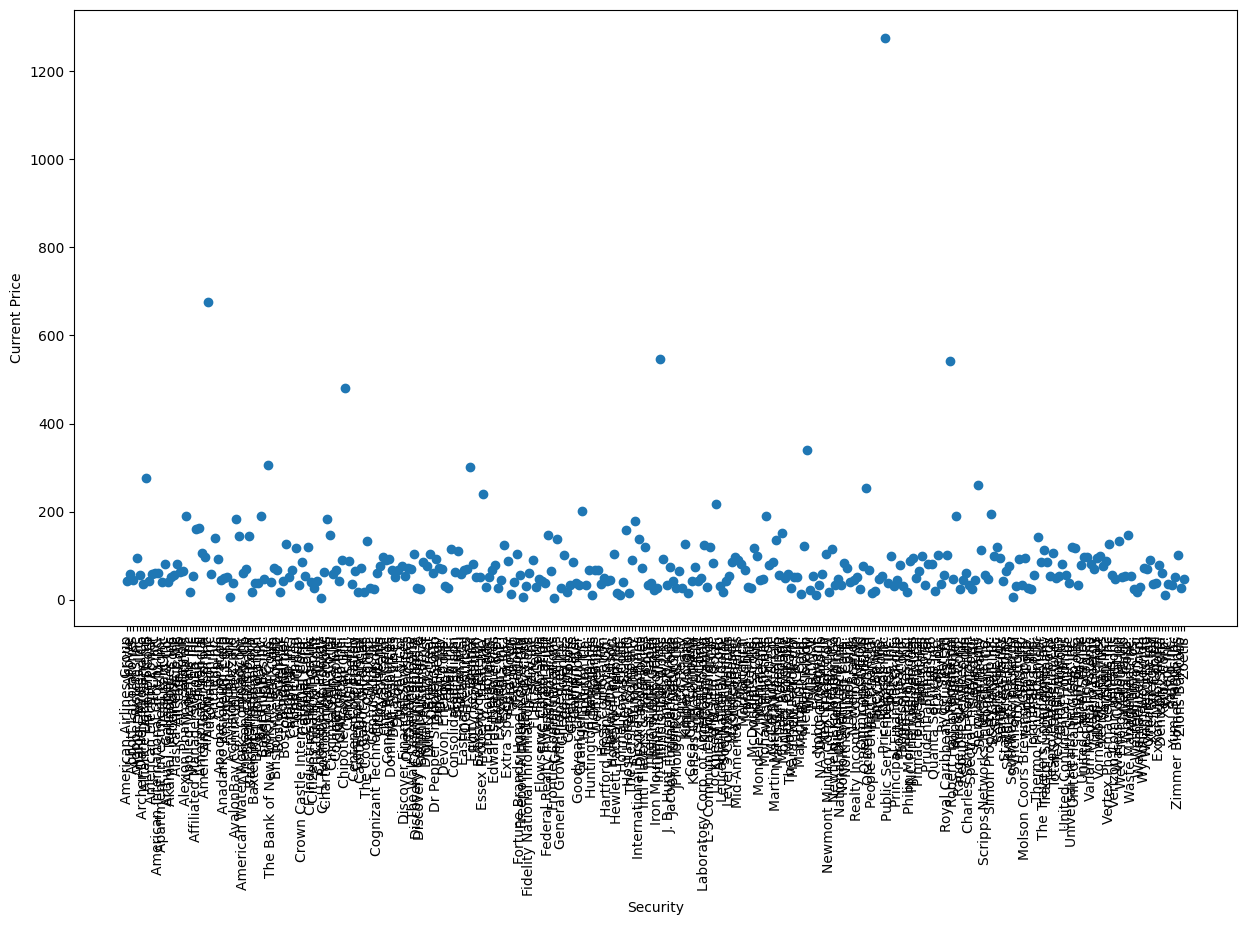

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(df.Security,df['Current Price'])
plt.xticks(rotation=90)
plt.xlabel('Security')
plt.ylabel('Current Price')



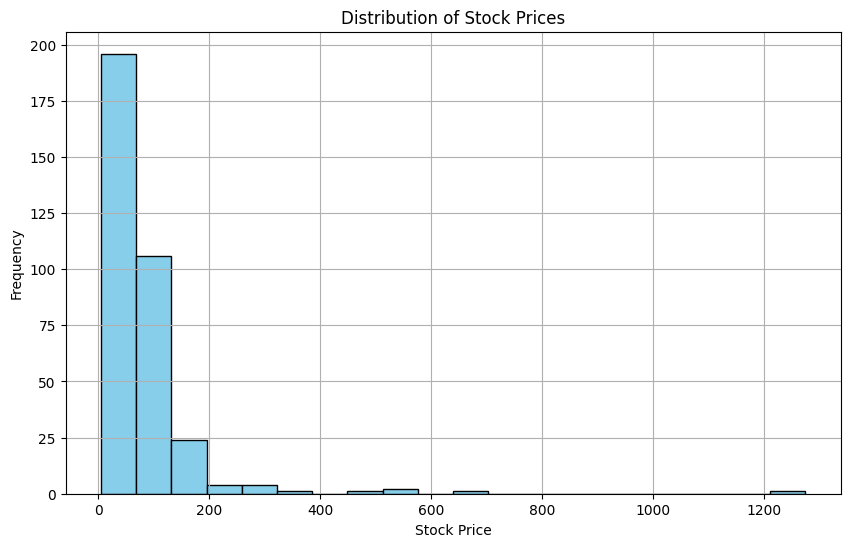

In [ ]:


plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting the histogram of stock prices
plt.hist(df['Current Price'], bins=20, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')

plt.grid(True)  # Add grid for better visualization (optional)

plt.show()


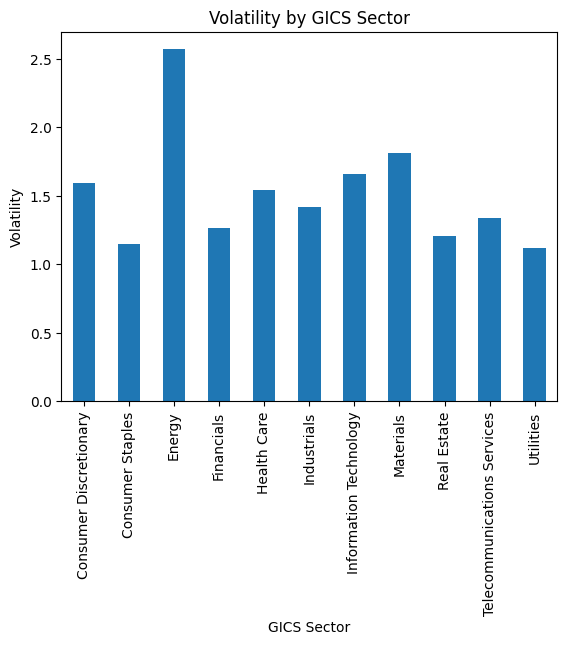

In [ ]:
#  Volatility by GICS Sector

df.groupby('GICS Sector')['Volatility'].mean().plot(kind='bar')
plt.xlabel('GICS Sector')
plt.ylabel('Volatility')
_ = plt.title('Volatility by GICS Sector')

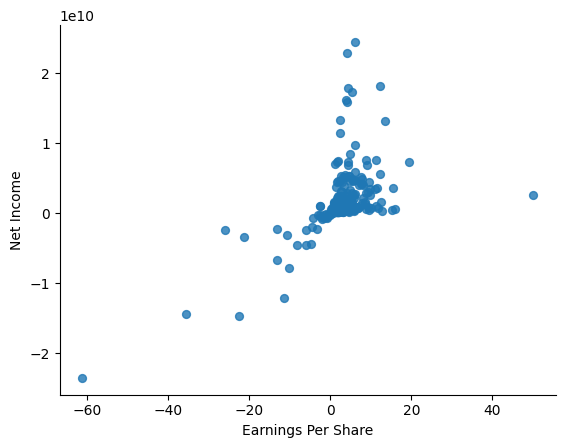

In [ ]:
# Earnings per share vs Net Income

df.plot(kind='scatter', x='Earnings Per Share', y='Net Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

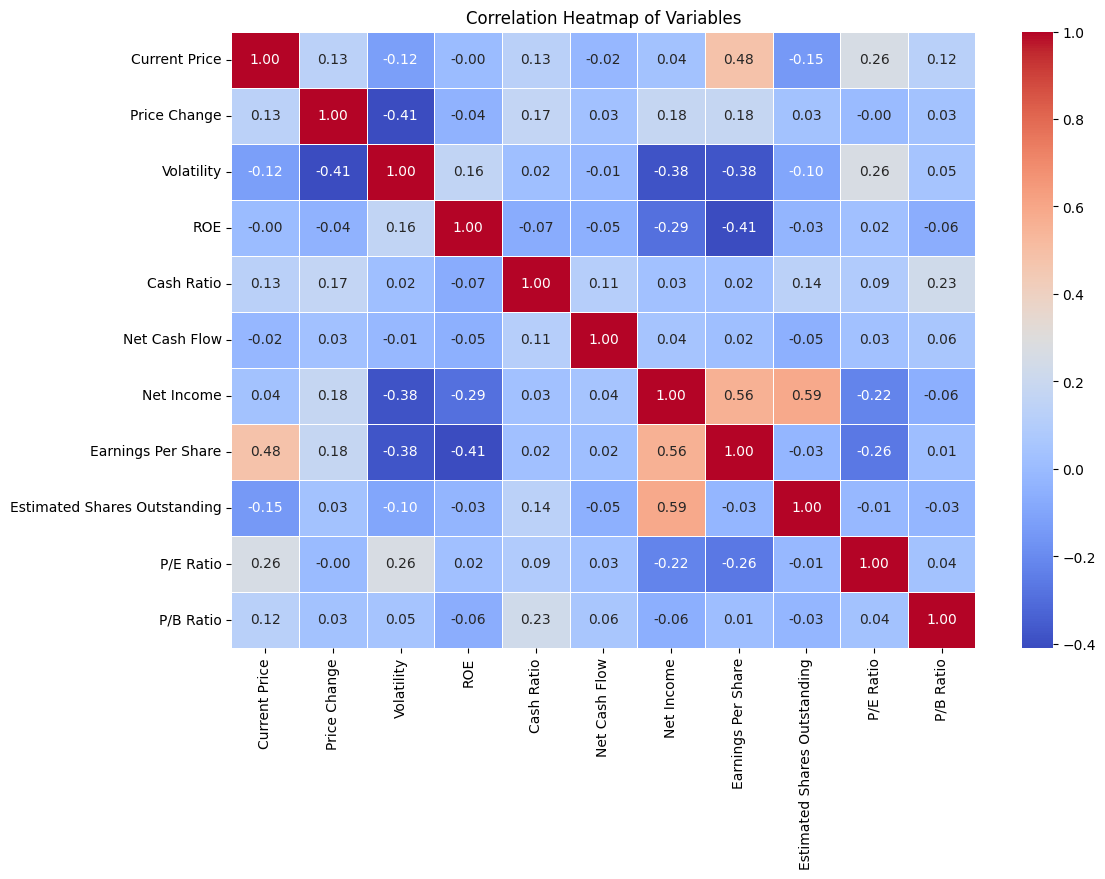

In [ ]:
# Selecting only the numerical columns for correlation analysis
numerical_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
                     'Net Cash Flow', 'Net Income', 'Earnings Per Share',
                     'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']
numeric_df = df[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

In [ ]:
# df.describe().T

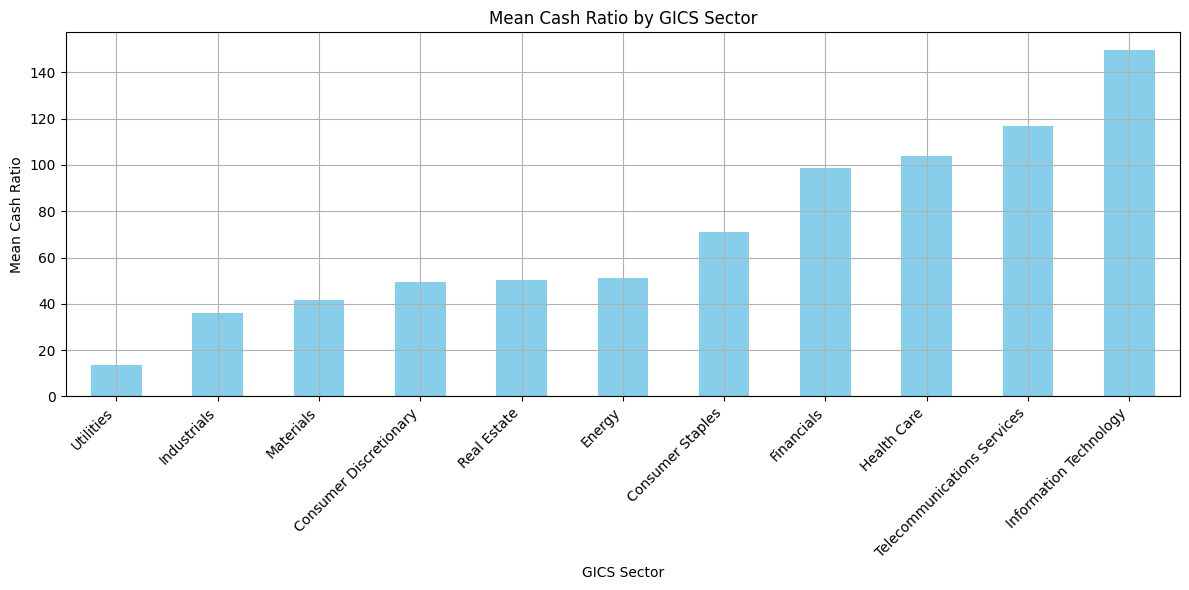

In [ ]:


# Grouping by 'GICS Sector' and calculating mean 'Cash Ratio'
grouped_data = df.groupby('GICS Sector')['Cash Ratio'].mean()

# Sorting the sectors based on mean cash ratio
grouped_data = grouped_data.sort_values()

# Plotting the bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
grouped_data.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Mean Cash Ratio by GICS Sector')
plt.xlabel('GICS Sector')
plt.ylabel('Mean Cash Ratio')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.grid(True)  # Add grid for better visualization (optional)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


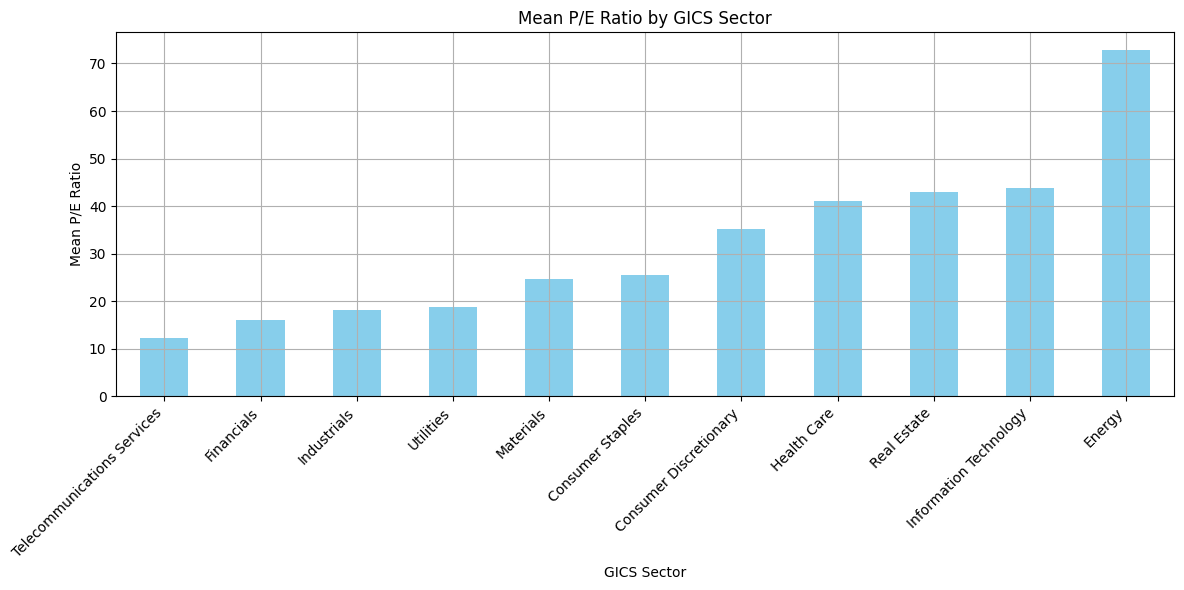

In [ ]:

# Grouping by 'GICS Sector' and calculating mean 'P/E Ratio'
grouped_data = df.groupby('GICS Sector')['P/E Ratio'].mean()

# Sorting the sectors based on mean P/E ratio
grouped_data = grouped_data.sort_values()

# Plotting the bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
grouped_data.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Mean P/E Ratio by GICS Sector')
plt.xlabel('GICS Sector')
plt.ylabel('Mean P/E Ratio')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
df.duplicated().sum()

0

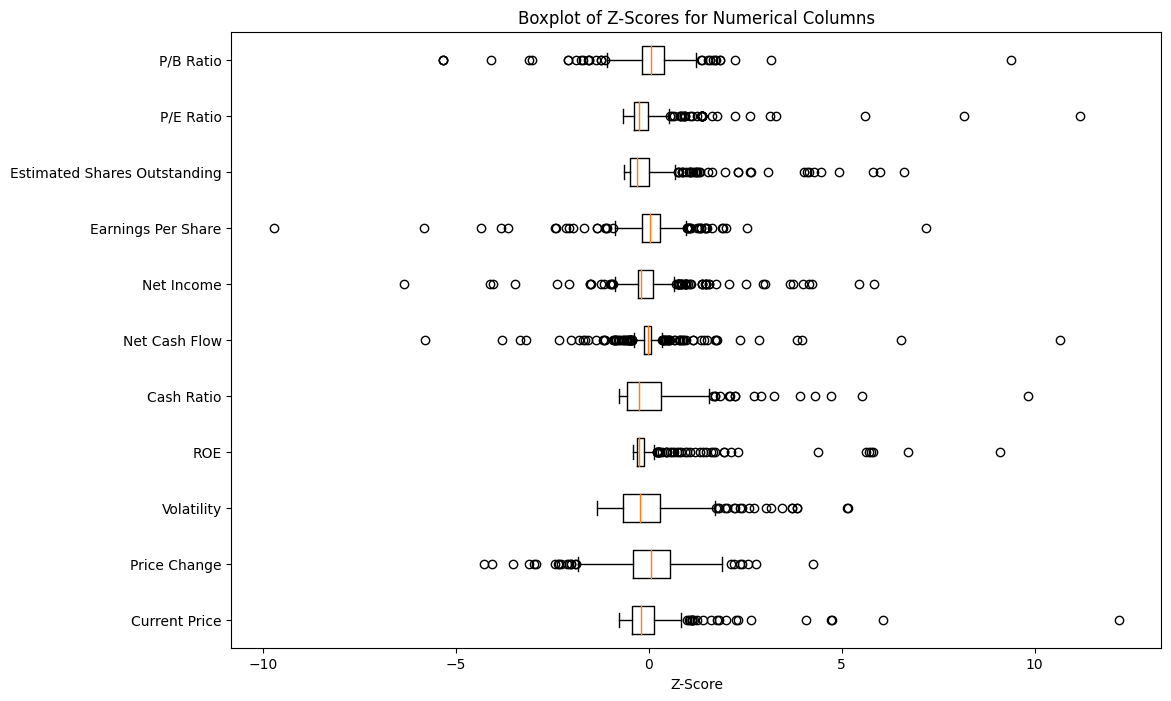

In [ ]:
from scipy.stats import zscore
from scipy.stats import boxcox

# outlier detection
z_scores = zscore(df[numerical_columns])

z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_df.values, labels=numerical_columns, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [ ]:


# Define a function to remove outliers using Box-Cox transformation
def remove_outliers_boxcox(data):
    # Added a small constant to handle zero and negative values--close to one
    data = data - data.min() + 1e-6
    transformed_data, _ = boxcox(data)
    return transformed_data

# Apply Box-Cox transformation to numerical columns
transformed_numerical_columns = df[numerical_columns].apply(remove_outliers_boxcox)
transformed_numerical_columns



,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,5.710400,116.098904,-0.046781,7.332854,6.837945,2.415463e+07,1.205861e+09,564.285697,165.538949,-0.239781,61.777266
1,6.607234,111.940627,0.403740,7.251835,8.044610,2.522336e+07,1.123341e+09,465.986536,193.602574,3.558591,61.808422
2,5.863917,119.376435,-0.563202,3.812852,7.622645,2.664354e+07,1.099028e+09,463.572856,190.873483,3.158619,69.421641
3,7.926437,126.169530,-0.439863,2.453747,10.978604,2.474937e+07,9.695851e+08,444.430665,157.117978,6.361568,73.599224
4,6.420382,87.123029,-0.032363,3.149814,12.656364,2.564939e+07,9.719063e+08,433.738638,204.566623,8.416676,70.744462
...,...,...,...,...,...,...,...,...,...,...,...
335,5.091042,128.496517,0.107810,3.260747,15.058207,2.344608e+07,7.948391e+08,379.602216,175.826609,4.399196,75.472790
336,6.279829,71.042416,-0.281198,7.442092,5.211004,2.539789e+07,9.924190e+08,463.917384,153.226442,3.439989,66.286007
337,8.191753,114.462096,-0.376571,-5.692772,8.879812,2.574720e+07,9.529217e+08,439.016363,130.578872,7.666477,47.964534
338,4.597342,88.720724,-0.294438,1.197716,8.846637,2.507006e+07,9.585374e+08,443.752538,138.907327,3.926313,69.722899


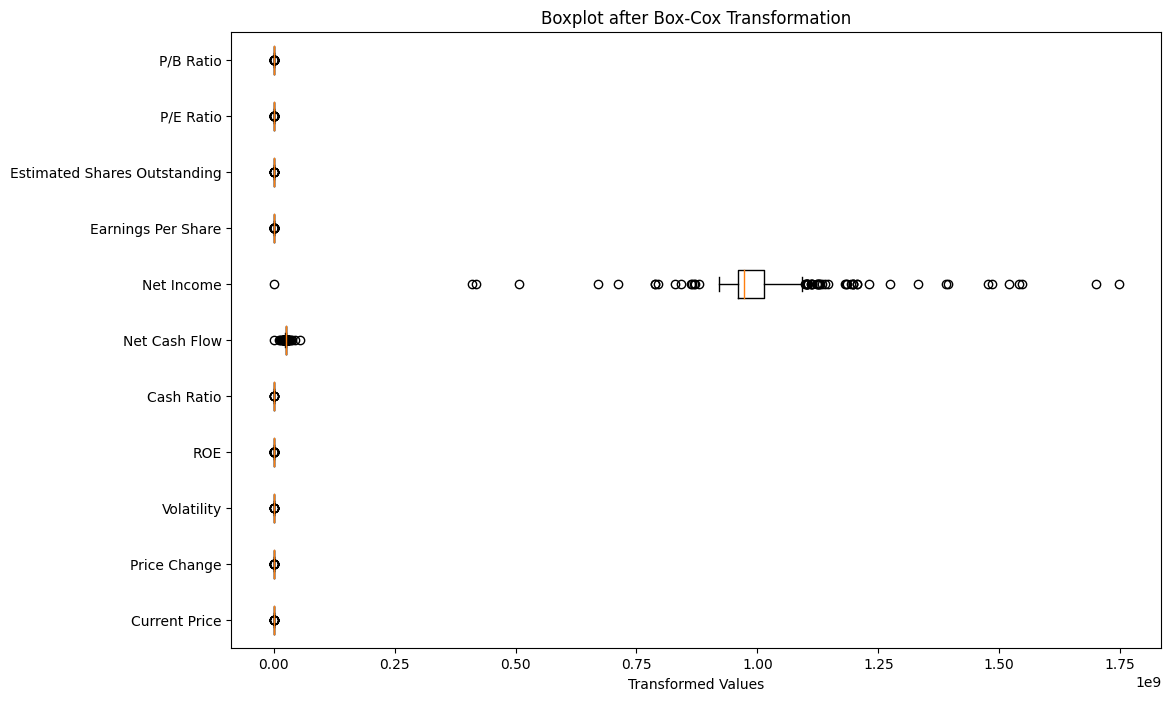

In [ ]:
# Plot boxplots of the transformed columns
plt.figure(figsize=(12, 8))
plt.boxplot(transformed_numerical_columns.values, labels=numerical_columns, vert=False)
plt.title('Boxplot after Box-Cox Transformation')
plt.xlabel('Transformed Values')
plt.show()

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'Net Income'
Q1_income = df['Net Income'].quantile(0.25)
Q3_income = df['Net Income'].quantile(0.75)

# Calculate the IQR (Q3 - Q1) for 'Net Income'
IQR_income = Q3_income - Q1_income

# Define a threshold for outlier detection (e.g., 1.5 times the IQR)
threshold_income = 1.5

# Define the lower and upper bounds for outlier detection
lower_bound_income = Q1_income - threshold_income * IQR_income
upper_bound_income = Q3_income + threshold_income * IQR_income

# Identify outliers based on the lower and upper bounds for 'Net Income'
outliers_income = (df['Net Income'] < lower_bound_income) | (df['Net Income'] > upper_bound_income)

# Remove outliers from the DataFrame
df_filtered_income = df[~outliers_income]



In [ ]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
#Feature Engineering

df['Market Cap'] = df['Current Price'] * df['Estimated Shares Outstanding']






In [ ]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Market Cap
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,2.829530e+10
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,9.673986e+10
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,6.756358e+10
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,4.693653e+10


## EDA

- It is a good idea to explore the data once again after manipulating it.

## K-means Clustering

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Net Income','Earnings Per Share']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df['cluster']=y_predicted
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Market Cap,cluster
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,2.829530e+10,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,9.673986e+10,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,6.756358e+10,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,4.693653e+10,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,1.243590e+11,0


In [ ]:
km.cluster_centers_

array([[ 1.26064943e+09,  3.19868421e+00],
       [ 1.63859091e+10,  5.89000000e+00],
       [-1.32240000e+10, -2.56500000e+01]])

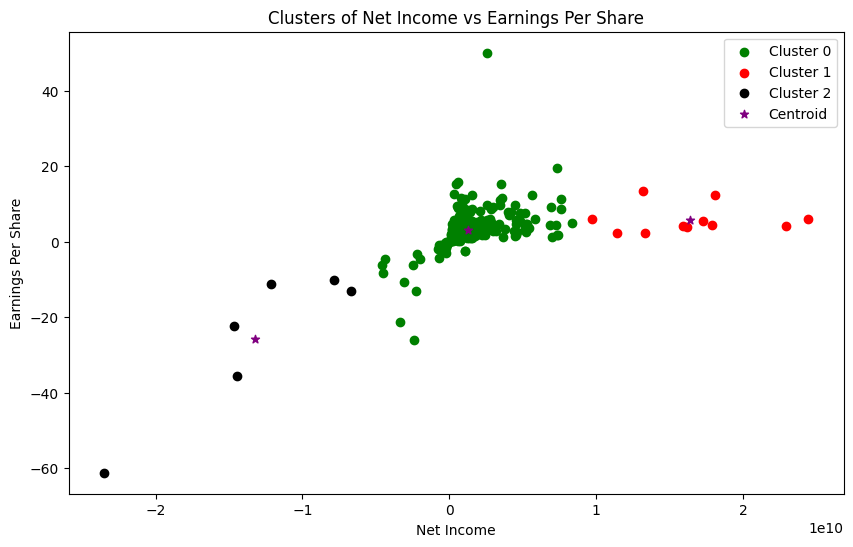

In [ ]:

# Separate data points by clusters
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

# Plot data points for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(df1['Net Income'], df1['Earnings Per Share'], color='green', label='Cluster 0')
plt.scatter(df2['Net Income'], df2['Earnings Per Share'], color='red', label='Cluster 1')
plt.scatter(df3['Net Income'], df3['Earnings Per Share'], color='black', label='Cluster 2')

# Plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')

# Add labels and legend
plt.title('Clusters of Net Income vs Earnings Per Share')
plt.xlabel('Net Income')
plt.ylabel('Earnings Per Share')
plt.legend()

# Show plot
plt.show()


In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Earnings Per Share']])
df['Earnings Per Share'] = scaler.transform(df[['Earnings Per Share']])

scaler.fit(df[['Net Income']])
df['Net Income'] = scaler.transform(df[['Net Income']])

In [ ]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Market Cap,cluster
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,0.649114,0.652260,6.681299e+08,3.718174,-8.784219,2.829530e+10,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,0.597707,0.578219,1.633016e+09,18.806350,-8.750068,9.673986e+10,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,0.582677,0.576332,1.504422e+09,15.275510,-0.394171,6.756358e+10,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,0.503597,0.561236,4.996437e+08,74.555557,4.199651,4.693653e+10,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,0.505001,0.552700,2.247994e+09,178.451613,1.059810,1.243590e+11,0


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Earnings Per Share','Net Income']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df['cluster']=y_predicted
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Market Cap,cluster
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,0.399602,0.508222,939457327.6,28.976191,6.261775,3.124635e+10,0
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,0.517428,0.576602,435353535.4,17.682214,-3.838260,2.286310e+10,0
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,0.493538,0.556923,188461538.5,131.525636,-23.884449,1.933427e+10,0
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,0.496925,0.560697,257892500.0,22.749999,-0.063096,7.040465e+09,0
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,0.497540,0.556025,498529411.8,70.470585,1.723068,2.388953e+10,0


In [ ]:
km.cluster_centers_

array([[0.58161755, 0.51857753],
       [0.60283943, 0.83205981],
       [0.37082547, 0.31758339]])

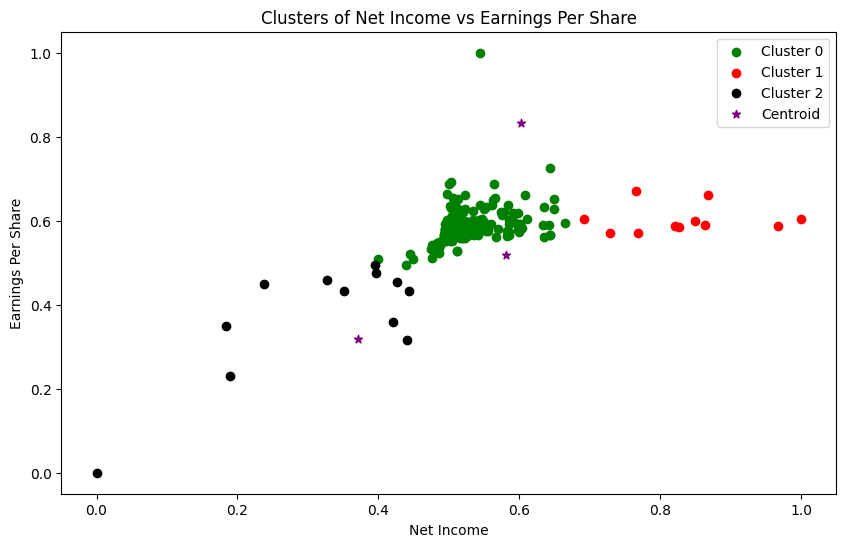

In [ ]:
# Separate data points by clusters
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

# Plot data points for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(df1['Net Income'], df1['Earnings Per Share'], color='green', label='Cluster 0')
plt.scatter(df2['Net Income'], df2['Earnings Per Share'], color='red', label='Cluster 1')
plt.scatter(df3['Net Income'], df3['Earnings Per Share'], color='black', label='Cluster 2')

# Plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')

# Add labels and legend
plt.title('Clusters of Net Income vs Earnings Per Share')
plt.xlabel('Net Income')
plt.ylabel('Earnings Per Share')
plt.legend()

# Show plot
plt.show()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Earnings Per Share','Net Income']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

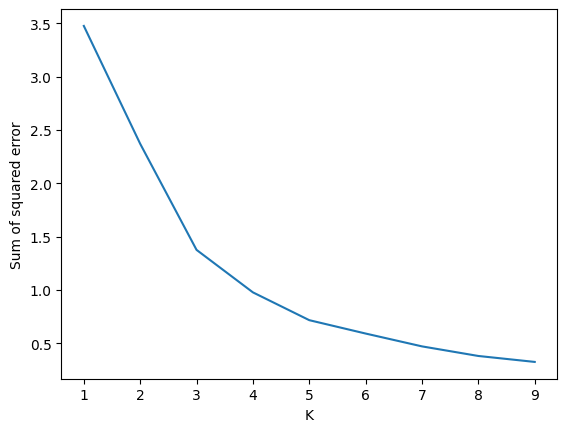

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Hierarchical Clustering

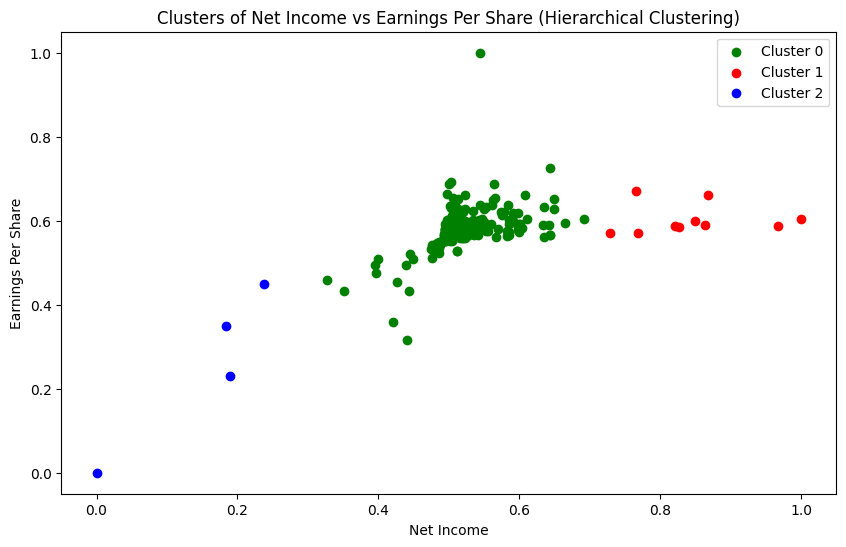

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=3)

# Extract relevant columns as features for clustering
X = df[['Net Income', 'Earnings Per Share']]


# Fit the hierarchical clustering model
agg_cluster.fit(X)

# Add cluster labels to your DataFrame
df['cluster'] = agg_cluster.labels_

# Separate data points by clusters
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

# Plot data points for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(df1['Net Income'], df1['Earnings Per Share'], color='green', label='Cluster 0')
plt.scatter(df2['Net Income'], df2['Earnings Per Share'], color='red', label='Cluster 1')
plt.scatter(df3['Net Income'], df3['Earnings Per Share'], color='blue', label='Cluster 2')

# Add labels and legend
plt.title('Clusters of Net Income vs Earnings Per Share (Hierarchical Clustering)')
plt.xlabel('Net Income')
plt.ylabel('Earnings Per Share')
plt.legend()

# Show plot
plt.show()

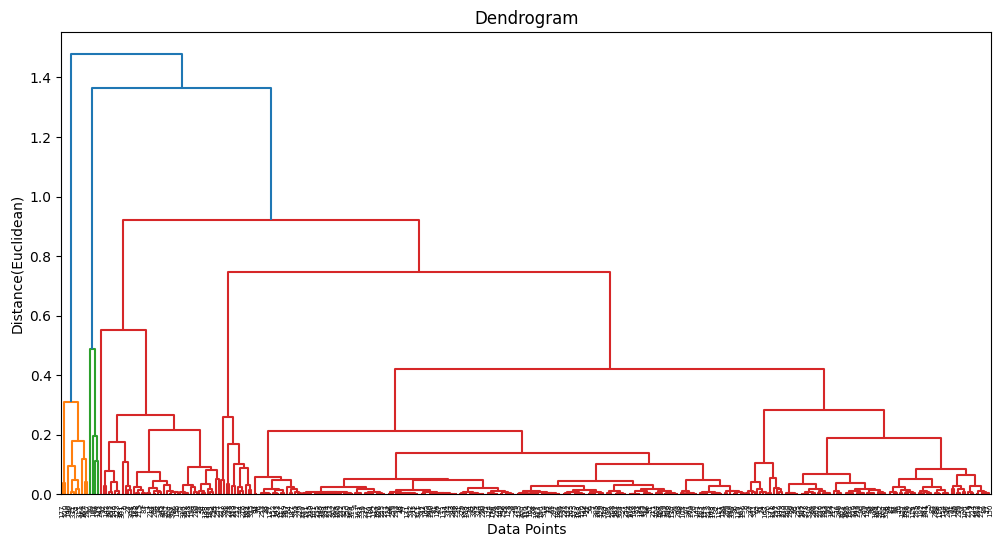

In [ ]:
from scipy.cluster import hierarchy
threshold = 1
# Compute the linkage matrix
Z = hierarchy.linkage(X, method='ward',metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance(Euclidean)')
plt.show()


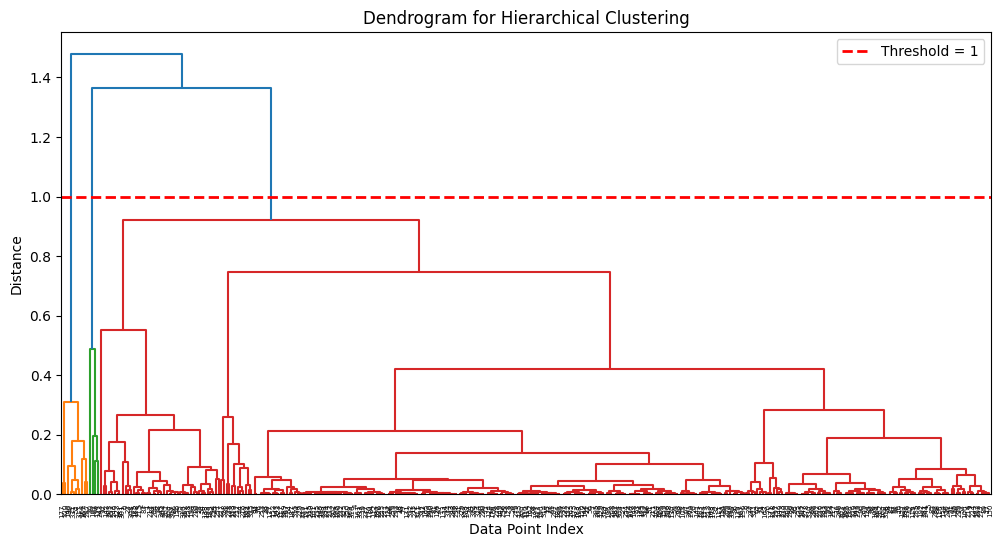

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram


# Calculate the linkage matrix using Ward's method
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, color_threshold=1)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label='Threshold = 1')
plt.legend()
plt.show()


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

-